In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import numpy as np
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.1
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb

In [3]:
# Load Mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, cache=True)
trX, teX, trY, teY = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)

# Data vectors are expected in columns
trX = trX.transpose();
teX = teX.transpose();

In [4]:
# dataset properties
print("Values per Image:", trX.shape[0])
print("Number of images for training:", trX.shape[1])
print("Number of images for testing:", teX.shape[1])
print("--- ---")

Values per Image: 784
Number of images for training: 46900
Number of images for testing: 23100
--- ---


(30, 512, 512)
(262144, 30)


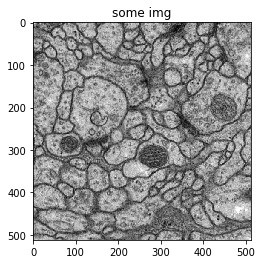

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline 
from skimage import io
im = io.imread(os.getcwd() + '/data/train-volume.tif')
print(im.shape)
ims = np.reshape(im, (30, 512 * 512)).transpose() 
print(ims.shape)

someimg = ims[:,2],(512,512);

plt.title("some img")
plt.imshow(np.reshape(ims[:,2],(512,512)), interpolation='nearest', cmap='gray')
plt.show()

In [6]:
#subsample if necessary
trainSampleSize = 1;
trXSub = trX[:,0:trainSampleSize]
testSampleSize = 1;
teXSub = teX[:,0:testSampleSize]
print("Values per Image:", trXSub.shape[0])
print("Number of images for training:", trXSub.shape[1])
print("Number of images for testing:", teXSub.shape[1])

Values per Image: 784
Number of images for training: 1
Number of images for testing: 1


In [8]:
# importlib.reload(pyb) # For some reason, this appears not to be working
unet = pyb.SegmentationExample(28,28,1,
                               6,12,
                               5,3,
                               0,0,
                               1,1)

6 aOutputDepth 28 aInputHeight  aInputWidth 5 aFilterHeight 5 aFilterWidth 0 aPaddingHeight 0 aPaddingWidth 1 aStride 
this->mOutputDims.Height: 24 this->mOutputDims.Width: 24
12 aOutputDepth 24 aInputHeight  aInputWidth 3 aFilterHeight 3 aFilterWidth 0 aPaddingHeight 0 aPaddingWidth 1 aStride 
this->mOutputDims.Height: 22 this->mOutputDims.Width: 22


In [9]:
unet.Train(trXSub,trXSub,0.00001)

fwd conv
mWeights
25 6
(*mInputPtr)
784 1
mOutput
576 6
fwd conv
mWeights
54 12
(*mInputPtr)
576 6
mOutput
484 12
fwd tran
mWeights
54 12
(*mInputPtr)
484 12
mOutput
576 6
fwd tran
mWeights
25 6
(*mInputPtr)
576 6
mOutput
784 1
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.152829
bwd tran
(*mBackpropInputPtr)
784 1
mBackpropOutput
576 6
mWeights
25 6
mGradientsWeights
25 6
bwd tran
(*mBackpropInputPtr)
576 6
mBackpropOutput
484 12
mWeights
54 12
mGradientsWeights
54 12
bwd conv
(*mBackpropInputPtr)
484 12
mBackpropOutput
576 6
mWeights
54 12
mGradientsWeights
54 12
bwd conv
(*mBackpropInputPtr)
576 6
mBackpropOutput
784 1
mWeights
25 6
mGradientsWeights
25 6
fwd conv
mWeights
25 6
(*mInputPtr)
784 1
mOutput
576 6
fwd conv
mWeights
54 12
(*mInputPtr)
576 6
mOutput
484 12
fwd tran
mWeights
54 12
(*mInputPtr)
484 12
mOutput
576 6
fwd tran
mWeights
25 6
(*mInputPtr)
576 6
mOutput
784 1
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.152488
bwd tran
(*mBa

mWeights
25 6
mGradientsWeights
25 6
fwd conv
mWeights
25 6
(*mInputPtr)
784 1
mOutput
576 6
fwd conv
mWeights
54 12
(*mInputPtr)
576 6
mOutput
484 12
fwd tran
mWeights
54 12
(*mInputPtr)
484 12
mOutput
576 6
fwd tran
mWeights
25 6
(*mInputPtr)
576 6
mOutput
784 1
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.144576
bwd tran
(*mBackpropInputPtr)
784 1
mBackpropOutput
576 6
mWeights
25 6
mGradientsWeights
25 6
bwd tran
(*mBackpropInputPtr)
576 6
mBackpropOutput
484 12
mWeights
54 12
mGradientsWeights
54 12
bwd conv
(*mBackpropInputPtr)
484 12
mBackpropOutput
576 6
mWeights
54 12
mGradientsWeights
54 12
bwd conv
(*mBackpropInputPtr)
576 6
mBackpropOutput
784 1
mWeights
25 6
mGradientsWeights
25 6
fwd conv
mWeights
25 6
(*mInputPtr)
784 1
mOutput
576 6
fwd conv
mWeights
54 12
(*mInputPtr)
576 6
mOutput
484 12
fwd tran
mWeights
54 12
(*mInputPtr)
484 12
mOutput
576 6
fwd tran
mWeights
25 6
(*mInputPtr)
576 6
mOutput
784 1
GetLoss(): ++++++++++++++++++++++++++++++++++++++

In [10]:
24 * 24

576

23*23